In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# начальные условия
n1, n2 = 100, 50 # количество объектов наблюдений в классах
a1, a2 = np.array([-1, 1]), np.array([-4,-4]) # вектора мат. ожиданий
r1, r2 = np.array([[2, 1], [1, 1]]), np.array([[2,-1],[-1, 1]]) # корр. матрицы
df1, df2 = np.random.multivariate_normal(a1, r1, n1),\
    np.random.multivariate_normal(a2, r2, n2) 
df1.shape, df2.shape # размерности массивов

((100, 2), (50, 2))

In [3]:
df = np.concatenate((df1, df2))
df.shape # размерность массивов после соединения

(150, 2)

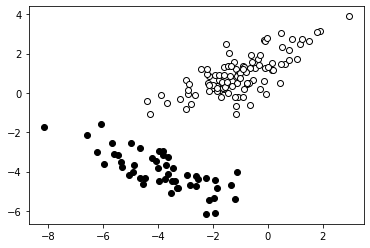

In [4]:
plt.subplot()
plt.scatter(x=df1[:,0], y=df1[:,1], c='white', edgecolors='black')
plt.scatter(x=df2[:,0], y=df2[:,1], c='black')
plt.savefig('data/gendatascatterplot-03.jpeg', dpi=500)

In [5]:
n_cluster = 2
clstr = KMeans(n_clusters=n_cluster, random_state=13).fit(df) # модель
y_predict = clstr.predict(df)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
centroids = clstr.cluster_centers_ # координаты всех центроид
centroids

array([[-0.98219257,  0.95937072],
       [-3.87872977, -3.84485305]])

In [7]:
labelsclst = clstr.labels_ # кластеры лейблы
labelsclst

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
clstr.inertia_

433.60608183208495

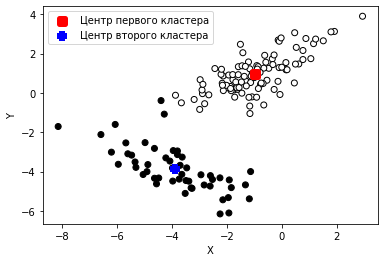

<Figure size 432x288 with 0 Axes>

In [9]:
plt.subplot()
plt.scatter(x=df[:,0],y=df[:,1], c=y_predict, cmap=plt.cm.binary, edgecolors='black')
plt.scatter(x=centroids[0,0], y=centroids[0,1], c='red', marker='s',linewidths=5,\
           label='Центр первого кластера')
plt.scatter(x=centroids[1,0], y=centroids[1,1], c='blue', marker='+',linewidths=10,\
            label='Центр второго кластера')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
plt.savefig('data/gendataclusters-03.jpeg', dpi=500)

## Abalone Data

In [10]:
abalone = pd.read_csv('data/abalone.data', usecols=['Sex','Length','Diameter'])
abalone.head()

,Sex,Length,Diameter
0,M,0.455,0.365
1,M,0.350,0.265
2,F,0.530,0.420
3,M,0.440,0.365
4,I,0.330,0.255


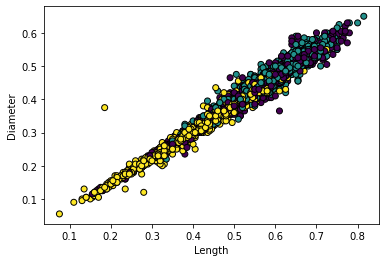

<Figure size 432x288 with 0 Axes>

In [11]:
plt.subplot()
plt.scatter(x=abalone.Length,y=abalone.Diameter, c=abalone.Sex.map({'M':0,'F':1,'I':2}), edgecolors='black')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()
plt.savefig('data/abalonebysex.jpeg', dpi=500)

In [12]:
n_clst_abalone = abalone.Sex.unique().size

In [13]:
clstabalone = KMeans(n_clusters=n_clst_abalone).fit(abalone[['Length','Diameter']])
y_predict_ab = clstabalone.predict(abalone[['Length','Diameter']])
y_predict_ab

array([2, 1, 2, ..., 0, 0, 0], dtype=int32)

In [14]:
clstabalone.inertia_

16.944872664511426

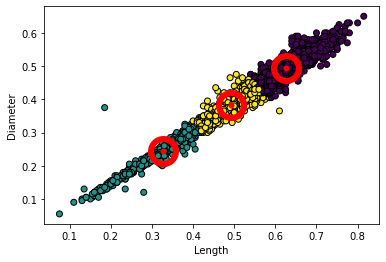

<Figure size 432x288 with 0 Axes>

In [15]:
plt.subplot()
plt.scatter(x=abalone.Length,y=abalone.Diameter, c=y_predict_ab, edgecolors='black')
plt.scatter(x=clstabalone.cluster_centers_[:,0],y=clstabalone.cluster_centers_[:,1],\
           c='red', linewidths=25, marker='o')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()
plt.savefig('data/clusterabalonebysex.jpeg', dpi=500)